# Classification of musical genres

## Libraries

In [ ]:
import os                                                   # Interact with the operating system
import errno                                                # Standard errno system symbols
import csv                                                  # Interact with .csv files
import soundfile as sf                                      # Process audio files
import numpy     as np                                      # Mathemtical functions
import pandas    as pd                                      # process the data
import seaborn   as sns                                     # Statistical data visualization
from sklearn.model_selection import train_test_split        # Split the data(training,test)
from sklearn.preprocessing   import StandardScaler          # Feature Scaling
from sklearn.ensemble        import RandomForestClassifier  # Train Algoritm
from sklearn.metrics         import confusion_matrix        # Measuring of algorith perfomance
from sklearn.metrics         import classification_report   # Report of the algorithm accuracy
from sklearn.externals       import joblib                  # Save Model
from matplotlib              import pyplot as plt           #Plot
plt.style.use('ggplot')

## Database

General Characteristics

In [ ]:
genre   = ['electro','rap','rock','salsa']  # genre's vector
fs      = 44100                             # Standard sample frequency for all songs
[ti,tf] = [40,45]                           # Standard Time segment to trim the songs

Wav Files

In [ ]:
for i in range(len(genre)):
    try:
        os.mkdir('Database/' + genre[i] + '/wavfiles')     # Make wavfiles folder
    except OSError as e:
        if e.errno != errno.EEXIST:                        # System error
            raise
    for j in range(40):
        try:
            n_in  = 'Database/' + genre[i] + '/Track_' + str(j+1) + '.mp3'
            n_out = 'Database/' + genre[i] + '/wavfiles/Track_' + str(j+1) + '.wav'
            os.system('ffmpeg -i ' + n_in +' '+ n_out)     # Convert .mp3 files to .wav files
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

Database Matrix

In [ ]:
# Make the Database matrix
Database=np.zeros([160,10*fs])
for i in range(0,len(genre),1):
    for j in range(40):
        if (i==0): k=j      # Genre[0] = Electro
        if (i==1): k=j+40   # Genre[1] = Rap
        if (i==2): k=j+80   # Genre[2] = Rock
        if (i==3): k=j+120  # Genre[3] = Salsa
        x,a=sf.read('Database/'+genre[i]+'/wavfiles/Track_'+str(j+1)+'.wav') # Read the songs
        xdati=x[int(ti*fs):int(tf*fs),0]                                     # Divide Left channel
        xdatd=x[int(ti*fs):int(tf*fs),1]                                     # Divide Right channel
        Database[k,:]=np.concatenate((xdati,xdatd),axis=None)                # concatenate channels for each row in matrix

In [ ]:
Database.shape

(160, 441000)

Fast Fourier Transform to Database Matrix

In [ ]:
#fft for each row (axis=1)
Database_fft=abs(np.fft.rfft(Database,axis=1))

In [ ]:
Database_fft.shape

(160, 220501)

Save de Database in a .csv File

In [ ]:
pd.DataFrame(Database_fft).to_csv('fft_Database.csv',index=None)

In [ ]:
pd.read_csv('fft_Database.csv')

,0,1,2,3,4,5,6,7,8,9,...,220491,220492,220493,220494,220495,220496,220497,220498,220499,220500
0,40.374695,27.752444,31.811325,14.355251,16.732195,31.968340,29.428578,20.900938,12.563004,13.663472,...,0.142252,0.347153,0.136234,0.338779,0.139092,0.348837,0.135297,0.342398,0.142259,0.338745
1,14.383972,16.492736,53.467186,29.856403,71.223745,17.949417,37.167709,16.227122,43.212111,25.190619,...,0.211261,0.481067,0.182405,0.192534,0.227109,0.386706,0.052695,0.702246,0.190691,0.945251
2,4.876556,56.472384,55.144929,68.214935,32.857278,28.036319,43.649947,54.357485,59.083102,58.751716,...,0.040338,0.008621,0.048869,0.036978,0.070169,0.024925,0.041872,0.021524,0.069301,0.033783
3,58.269989,60.261792,259.105133,49.168906,324.628725,52.323873,331.167529,57.497620,54.085055,88.729614,...,0.576168,0.983638,0.349470,1.033879,0.553551,0.502497,0.817244,0.869503,0.832876,0.591522
4,46.300568,20.660282,41.891719,30.329573,25.328290,26.498722,22.349660,16.547474,27.690085,10.471977,...,0.037534,0.086674,0.025399,0.090943,0.026913,0.088336,0.027516,0.078704,0.028472,0.075165
5,0.643738,45.089008,40.693905,77.962783,34.117270,73.968804,50.138399,39.110131,53.017297,6.344041,...,0.058150,0.189773,0.057129,0.188939,0.061382,0.187071,0.061792,0.180651,0.056713,0.188354
6,583.621735,60.081253,293.810945,17.037987,554.446531,61.443962,280.045236,22.788227,356.018251,59.076265,...,0.253662,0.686839,0.280433,0.813962,0.147425,0.388211,0.508321,0.828819,0.072967,0.620758
7,849.206573,61.746974,78.004019,18.063171,411.144909,59.812354,367.102752,23.340185,95.385360,56.397789,...,0.365695,0.590531,0.381051,0.452956,0.247351,1.052923,0.559273,1.100896,0.139717,0.644562
8,52.847870,84.795636,91.808109,43.638181,116.094292,58.279844,125.519784,59.974230,115.135708,60.236518,...,0.058459,0.061735,0.063564,0.065986,0.072811,0.063639,0.064978,0.069270,0.059448,0.072845
9,50.115753,102.466708,43.981173,34.553745,58.773559,60.503140,118.774860,18.047319,23.815744,64.845921,...,0.234802,0.398541,0.200150,0.364041,0.251664,0.381772,0.192896,0.397802,0.229891,0.358307


Label's vector

In [ ]:
gen=np.zeros(np.size(Database_fft,axis=0))
for i in range(len(genre)):
    if i==1: gen[40:80]=1
    if i==2: gen[80:120]=2
    if i==1: gen[120:160]=3
gen

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.])

## Classifier

Split the Data in Training set and Evaluation Set

In [ ]:
x = Database_fft     # Features
y = gen              # Labels
X_train,X_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state = 42,stratify=y) # Split the Data

### Random Forest Algorithm

Define and Tuning the model

In [ ]:
accuracy = np.array([])
while True:
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train) # fit and Standardize data
    np.append(accuracy,rfc.score(X_test,y_test))
    if rfc.score(X_test,y_test) > 0.7:
        break
        
print('Maximum accuracy for training set is :',rfc.score(X_test,y_test)*100)

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Nueva carpeta\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_est

Maximum accuracy for training set is : 71.875


* Evaluating the model with the test set

In [ ]:
y_pred_1 = rfc.predict(X_test)
confm    = confusion_matrix(y_test,y_pred_1)

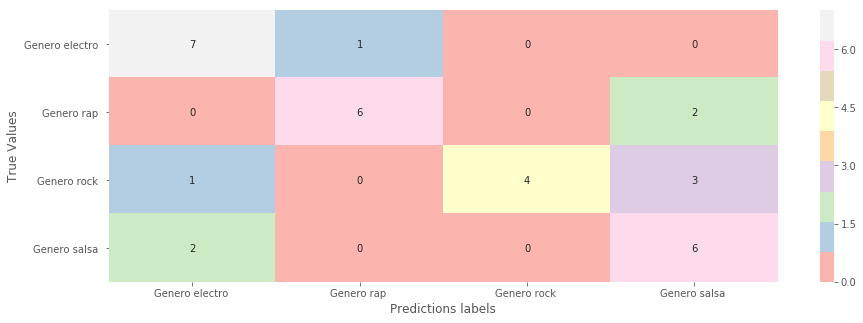

In [ ]:
columnas = ['Genero %s '%(i) for i in list(genre)[0:len(y_pred_1)]]
df_cm    = pd.DataFrame(confm,index=columnas,columns = columnas)

fig      = plt.figure(figsize=(15, 5))
grafica  = sns.heatmap(df_cm,cmap = 'Pastel1',annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions labels')
plt.show()

* Evaluating the model with the full Database

In [ ]:
y_pred_1 = rfc.predict(Database_fft)
confm    = confusion_matrix(gen,y_pred_1)

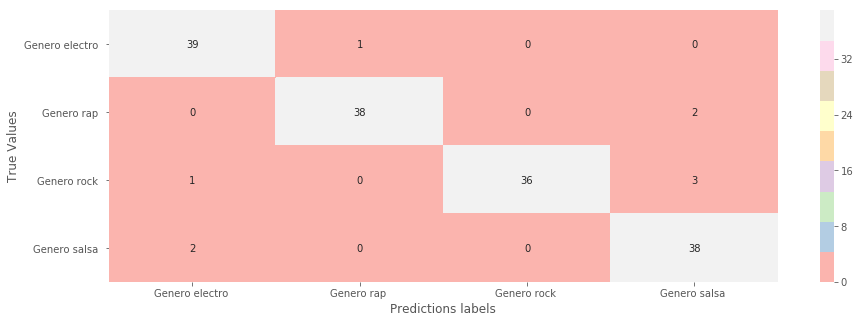

In [ ]:
columnas = ['Genero %s '%(i) for i in list(genre)[0:len(y_pred_1)]]
df_cm    = pd.DataFrame(confm,index=columnas,columns = columnas)

fig      = plt.figure(figsize=(15, 5))
grafica  = sns.heatmap(df_cm,cmap = 'Pastel1',annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions labels')
plt.show()

Report of classifier RamdomForest

In [ ]:
print(classification_report(gen,y_pred_1))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        40
         1.0       0.97      0.95      0.96        40
         2.0       1.00      0.90      0.95        40
         3.0       0.88      0.95      0.92        40

   micro avg       0.94      0.94      0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160



Save Model 

In [ ]:
joblib.dump(rfc,'RandomForest.pkl')

['RandomForest.pkl']